#### Libraries Installation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib for figures, inline >> print more beautifully figures

### Read Data and Data exploration
First column of the data is considered as predictor which is time.

Second column is set to the target which is the pitch angle.

In [ ]:
#Load data
Data = np.loadtxt('gyro_data.txt', delimiter=',')
t = Data[:,0]
pitchAngle = Data[:,1]

In [ ]:
#Data exploration
df = pd.DataFrame(Data, columns = ['time','pitch angle'])
df

,time,pitch angle
0,0.000005,2.6901
1,0.000010,9.1730
2,0.000015,-11.2890
3,0.000020,4.3181
4,0.000025,1.6028
...,...,...
199995,0.999980,367.7200
199996,0.999990,361.2100
199997,0.999990,357.6100
199998,1.000000,357.6000


### Data Visualization and Outlier Detection 
In this section data are ploted in order to analyze, visulaize, and detect the outliers. 

Outlier is defined as an observation point that is distant from other observations. Having a look on data, we observe that there are outliers can affect model accuracy, so it is recommended to detect outliers and either to fix or remove them.

However, outlier detection cannot rely on observations, it has to be performed via automatic method. A simple approach to detect outliers is to locate those samples that are far from the other samples in the feature space. The local outlier factor, LOF is used to implement that approach. It is a technique that attempts to harness the idea of k-nearest neighbors (KNN) for outlier detection. It works as marking each row in the training dataset as normal (1) or an outlier (-1). 


Data Visualization



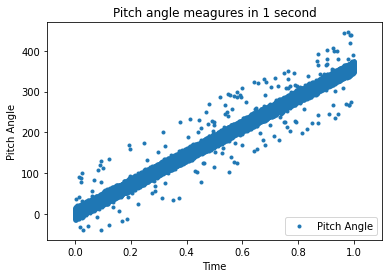


Outlier Detection & Removal using LocalOutlierFactor


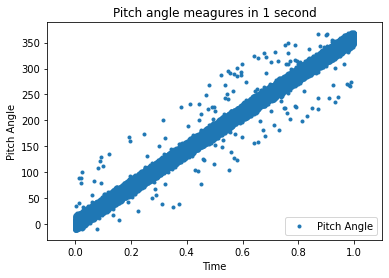

Before OutLier Removal : t size (200000,) and pitchAngle size (200000,)
After OutLier Removal : t size (199852, 1) and pitchAngle size (199852, 1)
148 data point have been identified as outliers



In [ ]:
print('Data Visualization\n')
plt.scatter(t, pitchAngle, marker='.', label="Pitch Angle")
plt.title('Pitch angle meagures in 1 second')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="lower right")
plt.xlim([-0.1, 1.1])
plt.show()

t1 = t.reshape(-1,1)
pitchAngle1 = pitchAngle.reshape(-1,1)
print('\nOutlier Detection & Removal using LocalOutlierFactor')
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(pitchAngle1)
#select all rows that are not outliers
mask = yhat != -1
t1, pitchAngle1 = t1[mask, :], pitchAngle1[mask]
plt.scatter(t1, pitchAngle1, marker='.', label="Pitch Angle")
plt.title('Pitch angle meagures in 1 second')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="lower right")
plt.xlim([-0.1, 1.1])
plt.show()
print(f'Before OutLier Removal : t size {t.shape} and pitchAngle size {pitchAngle.shape}')
print(f'After OutLier Removal : t size {t1.shape} and pitchAngle size {pitchAngle1.shape}')
print(f'{np.sum(yhat == -1)} data point have been identified as outliers\n')


### Moving Average Filter
We see that LOF is not the best way, it just removed 148 point out of 20000 points. This is because most of data points are near to each other. 

So, Moving Average Filter is the better solution. The moving average filter is a simple Low Pass filter commonly used for smoothing an array of sampled data/signal. It takes L input points, computes the average of those L-points and produces a single output point. So, unlike LOF, MAV does not reduce the sample set because no data points are removed. It is replacement of data with new one based on average. 

L is set based on some trials and best value was found at L = 10

Before MAV : t size (200000,) and pitchAngle size (200000,)
After MAV : t size (200000,) and pitchAngle size (200000,)
Moving Average Filter does not remove data points, it updates them as the size of dataset still the same after applying MAV



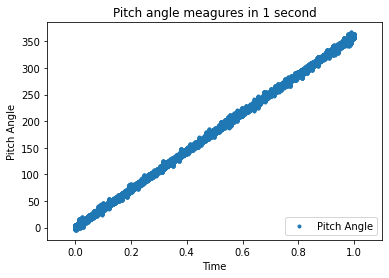

In [ ]:
from scipy import signal
L = 10 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function
print(f'Before MAV : t size {t.shape} and pitchAngle size {pitchAngle.shape}')
pitchAngle = signal.lfilter(b,a,pitchAngle) #filter output using lfilter function
print(f'After MAV : t size {t.shape} and pitchAngle size {pitchAngle.shape}')
print('Moving Average Filter does not remove data points, it updates them as the size of dataset still the same after applying MAV\n')

plt.scatter(t, pitchAngle, marker='.', label="Pitch Angle")
plt.title('Pitch angle meagures in 1 second')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="lower right")
plt.xlim([-0.1, 1.1])
plt.show()

### Confidence Interval 

In [ ]:
std = np.std(pitchAngle)
mean = np.mean(pitchAngle)
n = pitchAngle.size
Standard_Error = std/np.sqrt(n)
z = 1.96 #Confidence level =0.95 P(0.95+(0.05/2)) = P(0.975) corresponds to z = 1.96
ME = z*Standard_Error
CI_Lower = mean-ME
CI_Upper = mean+ME
print(f'Standard Deviation: {std}\nMean: {mean}\nStandard Error: {Standard_Error}\nMarginal Error: {ME}\nConfidence Interval: [{CI_Lower}, {CI_Upper}]')

Standard Deviation: 103.93830249647218
Mean: 179.99830866195808
Standard Error: 0.2324131098480479
Marginal Error: 0.45552969530217385
Confidence Interval: [179.5427789666559, 180.45383835726025]


### Linear Regression

<center><b>Simple Linear Regression Equation</b></center>
$$y = \beta_0 + \beta_1x_1 + \epsilon$$
<br>

In [ ]:
Y = pitchAngle
X0 = np.ones(t.size).reshape(-1,1)
X1 = t.reshape(-1,1)
X = np.concatenate((X0,X1), axis=1)
Xt = np.transpose(X)
B = np.linalg.multi_dot([np.linalg.inv(np.dot(Xt,X)),Xt, Y])
e = Y-np.dot(X,B)
Y_estimate = np.dot(X,B)+e

In [ ]:
print(f'Coefficients: B0 = {B[0]}, B1 = {B[1]}')

Coefficients: B0 = -0.006058340786148693, B1 = 360.00538800741157


#### Validation: 
In this section, validation for the linear regression model is conducted through several methods.
> First: substitue the values for x which is time into the estimated equation after getting the coefficients, this will give the same actual data for y which is pitch angle, as shown below. In addition, applying some metrics like MSE, root MSE, and R score to explore the error between actual and estimated data,  errors are mostly zero. 

> Second: Apply LinearRegression model from sklearn library, it gives same coefficients; slope, and intercept. 

In [ ]:
eval_df = pd.DataFrame({'Actual': Y, 'Estimated': Y_estimate})
eval_df

,Actual,Estimated
0,0.26901,0.26901
1,1.18631,1.18631
2,0.05741,0.05741
3,0.48922,0.48922
4,0.64950,0.64950
...,...,...
199995,360.71200,360.71200
199996,360.62000,360.62000
199997,360.87100,360.87100
199998,360.46100,360.46100


In [ ]:
#Evaluate model error 
from sklearn import metrics
print('\nModel error')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_estimate))
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_estimate))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_estimate)))
print('Coefficient of Determination R score:', metrics.r2_score(Y, Y_estimate))



Model error
Mean Absolute Error: 2.8722033432182493e-19
Mean Squared Error: 9.914187909665713e-35
Root Mean Squared Error: 9.957001511331468e-18
Coefficient of Determination R score: 1.0


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(t.reshape(-1,1), pitchAngle.reshape(-1,1)) #uses Gradient Descent
print(f"Model intercept : {regressor.intercept_[0]}")
print(f"Model coefficient : {regressor.coef_[0]}")

Model intercept : -0.006058340788939631
Model coefficient : [360.00538801]
